In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

In [2]:
print(torch.__version__)

0.4.0


In [29]:
batchsize=128
epoch_num=500
learning_rate=0.0002

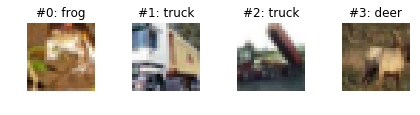

In [42]:
# coding: utf-8

# In[2]:


from __future__ import print_function, division


# In[87]:


import os
#import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import utils
#import torchvision


# In[88]:


plt.ion()


# In[104]:


transform_train = transforms.Compose([
    transforms.RandomCrop(24),
    transforms.RandomHorizontalFlip(),
    #transforms.ColorJitter(2, 2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    #transforms.RandomAffine(15, shear=15),
])

transform_test = transforms.Compose([
    transforms.CenterCrop(24),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# In[105]:


trainset = torchvision.datasets.CIFAR10(root='~/eunbi', train=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True, num_workers=4)


# In[106]:


testset = torchvision.datasets.CIFAR10(root='~/eunbi', train=False, transform=transform_test)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=False, num_workers=4)


# In[107]:


num_classes = 10
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# In[117]:


fig = plt.figure()

for i in range(4):
    image, label = trainset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('#{}: {}'.format(i, classes[label]))
    ax.axis('off')

    image = image / 2 + 0.5     # unnormalize
    npimage = image.numpy()
    npimage = np.transpose(npimage, (1, 2, 0))
    plt.imshow(npimage)
    
image = image.unsqueeze(0)

In [43]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [44]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, stride=1, kernel_size=1)
        self.conv2 = nn.Conv2d(32, 10, kernel_size=3)
        self.conv3 = nn.Conv2d(10, 20, kernel_size=2)
        self.conv4 = nn.Conv2d(20, 40, kernel_size=3)
        self.conv5 = nn.Conv2d(40, 30, kernel_size=2)
        self.mp = nn.MaxPool2d(2, padding=1, stride=1)
        self.fc1 = nn.Linear(15870, 60)           # 500 can be changed
        self.fc2 = nn.Linear(60, 30)
        self.fc3 = nn.Linear(30, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(F.relu(self.conv1(x)))
        x = self.mp(F.relu(self.conv2(x)))
        x = self.mp(F.relu(self.conv3(x)))
        x = self.mp(F.relu(self.conv4(x)))
        x = self.mp(F.relu(self.conv5(x)))
        x = x.view(in_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

if torch.cuda.is_available():
    net.to(device)

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [46]:
#Training the network


if torch.cuda.is_available():
    for epoch in range(epoch_num):  
        for i,(images, labels) in enumerate(trainloader):
            images=images.to(device)
            labels=labels.to(device)
            
            optimizer.zero_grad()

            #Forward Backward Optimize
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            if i%1000==0:
                print('Number of epochs: %d, Mini Batch order: %d' %(epoch+1,i))
                #torch.save(model,'./cifar_model.pkl')              
else:
    for epoch in range(epoch_num):  
        for i, data in enumerate(trainloader,0):
            inputs, labels = data 
            
            optimizer.zero_grad()

            #Forward Backward Optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

                # print statistics
            if i%1000==0:
                print('Number of epochs: %d, Per Batch: %d' %(epoch+1,i))
                #torch.save(model,'./cifar_model.pkl')

print('Finished Training')

Number of epochs: 1, Mini Batch order: 0
Number of epochs: 2, Mini Batch order: 0
Number of epochs: 3, Mini Batch order: 0
Number of epochs: 4, Mini Batch order: 0
Number of epochs: 5, Mini Batch order: 0
Number of epochs: 6, Mini Batch order: 0
Number of epochs: 7, Mini Batch order: 0
Number of epochs: 8, Mini Batch order: 0
Number of epochs: 9, Mini Batch order: 0
Number of epochs: 10, Mini Batch order: 0
Number of epochs: 11, Mini Batch order: 0
Number of epochs: 12, Mini Batch order: 0
Number of epochs: 13, Mini Batch order: 0
Number of epochs: 14, Mini Batch order: 0
Number of epochs: 15, Mini Batch order: 0
Number of epochs: 16, Mini Batch order: 0
Number of epochs: 17, Mini Batch order: 0
Number of epochs: 18, Mini Batch order: 0
Number of epochs: 19, Mini Batch order: 0
Number of epochs: 20, Mini Batch order: 0
Number of epochs: 21, Mini Batch order: 0
Number of epochs: 22, Mini Batch order: 0
Number of epochs: 23, Mini Batch order: 0
Number of epochs: 24, Mini Batch order: 0
N

Number of epochs: 195, Mini Batch order: 0
Number of epochs: 196, Mini Batch order: 0
Number of epochs: 197, Mini Batch order: 0
Number of epochs: 198, Mini Batch order: 0
Number of epochs: 199, Mini Batch order: 0
Number of epochs: 200, Mini Batch order: 0
Number of epochs: 201, Mini Batch order: 0
Number of epochs: 202, Mini Batch order: 0
Number of epochs: 203, Mini Batch order: 0
Number of epochs: 204, Mini Batch order: 0
Number of epochs: 205, Mini Batch order: 0
Number of epochs: 206, Mini Batch order: 0
Number of epochs: 207, Mini Batch order: 0
Number of epochs: 208, Mini Batch order: 0
Number of epochs: 209, Mini Batch order: 0
Number of epochs: 210, Mini Batch order: 0
Number of epochs: 211, Mini Batch order: 0
Number of epochs: 212, Mini Batch order: 0
Number of epochs: 213, Mini Batch order: 0
Number of epochs: 214, Mini Batch order: 0
Number of epochs: 215, Mini Batch order: 0
Number of epochs: 216, Mini Batch order: 0
Number of epochs: 217, Mini Batch order: 0
Number of e

Number of epochs: 386, Mini Batch order: 0
Number of epochs: 387, Mini Batch order: 0
Number of epochs: 388, Mini Batch order: 0
Number of epochs: 389, Mini Batch order: 0
Number of epochs: 390, Mini Batch order: 0
Number of epochs: 391, Mini Batch order: 0
Number of epochs: 392, Mini Batch order: 0
Number of epochs: 393, Mini Batch order: 0
Number of epochs: 394, Mini Batch order: 0
Number of epochs: 395, Mini Batch order: 0
Number of epochs: 396, Mini Batch order: 0
Number of epochs: 397, Mini Batch order: 0
Number of epochs: 398, Mini Batch order: 0
Number of epochs: 399, Mini Batch order: 0
Number of epochs: 400, Mini Batch order: 0
Number of epochs: 401, Mini Batch order: 0
Number of epochs: 402, Mini Batch order: 0
Number of epochs: 403, Mini Batch order: 0
Number of epochs: 404, Mini Batch order: 0
Number of epochs: 405, Mini Batch order: 0
Number of epochs: 406, Mini Batch order: 0
Number of epochs: 407, Mini Batch order: 0
Number of epochs: 408, Mini Batch order: 0
Number of e

In [47]:
#Test data

with torch.no_grad():
    num_correct = 0
    total_data = 0
    if torch.cuda.is_available():
        for images, labels in testloader:
            images=images.to(device)
            labels=labels.to(device)
            output = net(images)
            _, expected = torch.max(output.data, 1)

            total_data += labels.size(0)
            num_correct += (expected == labels).sum().item()
    else:
        for data in testloader:
            image, label=data
            output = net(image)
            _, expected = torch.max(output.data, 1)

            total_data += label.size(0)
            num_correct += (expected == label).sum().item()
        
print('Accuracy of the Data: %d %%' % (100 * num_correct / total_data))

Accuracy of the Data: 75 %


In [48]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        _, expected = torch.max(output, 1)
        c = (expected == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

RuntimeError: Expected object of type torch.FloatTensor but found type torch.cuda.FloatTensor for argument #2 'weight'